<a href="https://colab.research.google.com/github/galungan012-spec/Uas_FirstlyShuresJeffryson/blob/main/UasMachineLearning_Firstly_Shures_Jeffryson_227006516080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:

# 2. Import library yang dibutuhkan
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [104]:
# 3. Tentukan path file txt di Drive
file_path = '/content/drive/MyDrive/data.txt'  # Ganti path ini sesuai letak file kamu


In [109]:
# 4. Baca file txt tanpa header
# Misal tiap baris berisi nilai yang dipisah spasi, koma, atau tab
# Sesuaikan delimiter sesuai file txt kamu
data = pd.read_csv(file_path, header=None, delimiter=' ')

In [111]:
# 5. Tambahkan nama kolom manual, contoh: ['F1', 'F2', 'F3', 'F4']
# Ganti jumlah kolom sesuai data kamu
data.columns = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']

In [112]:
# 6. Cek data
print("5 data pertama:")
print(data.head())

5 data pertama:
         date             time  epoch  moteid  temperature  humidity  light  \
0  2004-03-31  03:38:15.757551      2     1.0     122.1530  -3.91901  11.04   
1  2004-02-28   00:59:16.02785      3     1.0      19.9884  37.09330  45.08   
2  2004-02-28   01:03:16.33393     11     1.0      19.3024  38.46290  45.08   
3  2004-02-28  01:06:16.013453     17     1.0      19.1652  38.80390  45.08   
4  2004-02-28  01:06:46.778088     18     1.0      19.1750  38.83790  45.08   

   voltage  
0  2.03397  
1  2.69964  
2  2.68742  
3  2.68742  
4  2.69964  


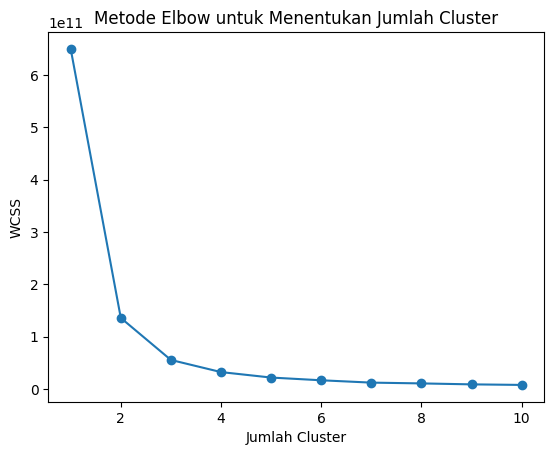

In [130]:
# 7. Tentukan jumlah cluster optimal dengan metode Elbow
wcss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit(numerical_data)
    wcss.append(kmeans_test.inertia_)

plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [148]:
# 8. Pilih jumlah cluster (misal 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(numerical_data)

KMeans(n_clusters=3, random_state=42)

In [134]:
# 9. Simpan label cluster ke dataframe
# Add the cluster labels to the numerical_data DataFrame first
numerical_data['Cluster'] = kmeans.labels_

# Merge the cluster labels back to the original DataFrame based on index
data = data.merge(numerical_data[['Cluster']], left_index=True, right_index=True, how='left')

In [135]:
# 10. Tampilkan centroid cluster
print("Centroid cluster:")
print(kmeans.cluster_centers_)

Centroid cluster:
[[4.06766370e+01 3.15513971e+01 6.54231109e+02 2.50227894e+00
  8.55271409e-12]
 [3.99756558e+01 3.13375312e+01 1.62685420e+03 2.51038239e+00
  1.00000000e+00]
 [3.86786429e+01 3.48146306e+01 1.02550363e+02 2.48351589e+00
  2.00000000e+00]]


In [136]:
# 11. Tampilkan data dengan cluster
print("\nData dengan cluster:")
print(data.head())


Data dengan cluster:
         date             time  epoch  moteid  temperature  humidity  light  \
0  2004-03-31  03:38:15.757551      2     1.0     122.1530  -3.91901  11.04   
1  2004-02-28   00:59:16.02785      3     1.0      19.9884  37.09330  45.08   
2  2004-02-28   01:03:16.33393     11     1.0      19.3024  38.46290  45.08   
3  2004-02-28  01:06:16.013453     17     1.0      19.1652  38.80390  45.08   
4  2004-02-28  01:06:46.778088     18     1.0      19.1750  38.83790  45.08   

   voltage  Cluster_x  Cluster_y  Cluster  
0  2.03397        2.0        2.0      2.0  
1  2.69964        2.0        2.0      2.0  
2  2.68742        2.0        2.0      2.0  
3  2.68742        2.0        2.0      2.0  
4  2.69964        2.0        2.0      2.0  


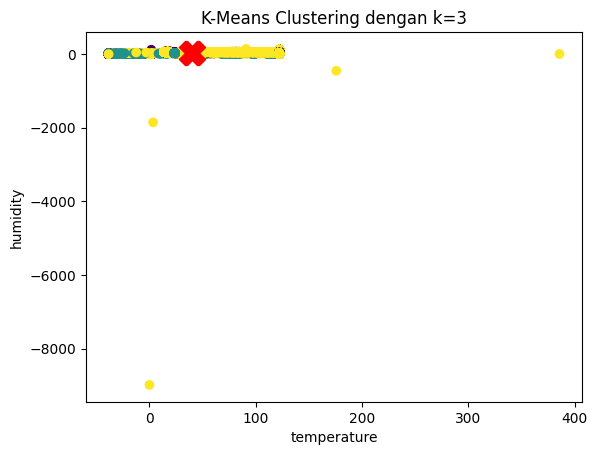

In [138]:
# 12. Visualisasi (jika fitur minimal 2)
# Check if the required columns exist in the DataFrame
if 'temperature' in data.columns and 'humidity' in data.columns and 'Cluster' in data.columns:
    plt.scatter(data['temperature'], data['humidity'], c=data['Cluster'], cmap='viridis')
    # Check if kmeans.cluster_centers_ has at least 2 dimensions for plotting
    if kmeans.cluster_centers_.shape[1] >= 2:
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.xlabel('temperature')
    plt.ylabel('humidity')
    plt.title(f'K-Means Clustering dengan k={k}')
    plt.show()
else:
    print("Required columns for visualization ('temperature', 'humidity', or 'Cluster') not found in the DataFrame.")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


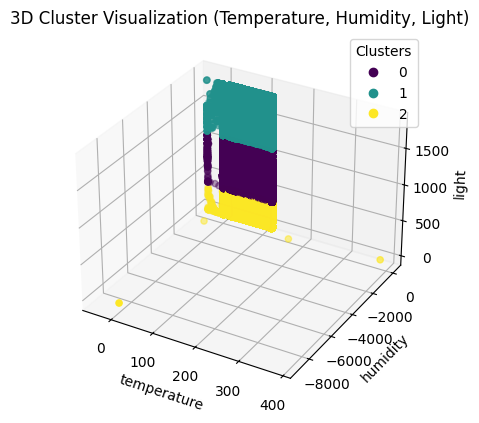

In [142]:
from mpl_toolkits.mplot3d import Axes3D

# Check if the required columns exist in the DataFrame
if 'temperature' in data.columns and 'humidity' in data.columns and 'light' in data.columns and 'Cluster' in data.columns:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data['temperature'], data['humidity'], data['light'], c=data['Cluster'], cmap='viridis')
    ax.set_xlabel('temperature')
    ax.set_ylabel('humidity')
    ax.set_zlabel('light')
    plt.title('3D Cluster Visualization (Temperature, Humidity, Light)')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()
else:
    print("Required columns for 3D visualization ('temperature', 'humidity', 'light', or 'Cluster') not found in the DataFrame.")

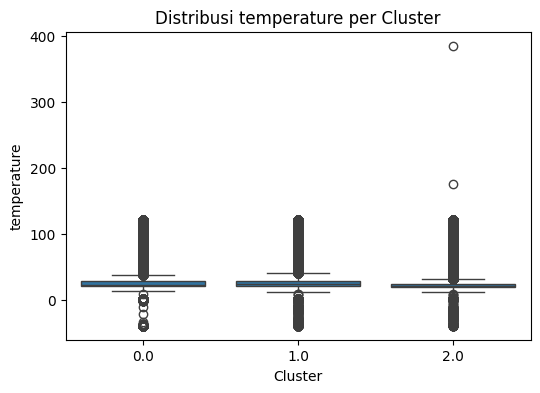

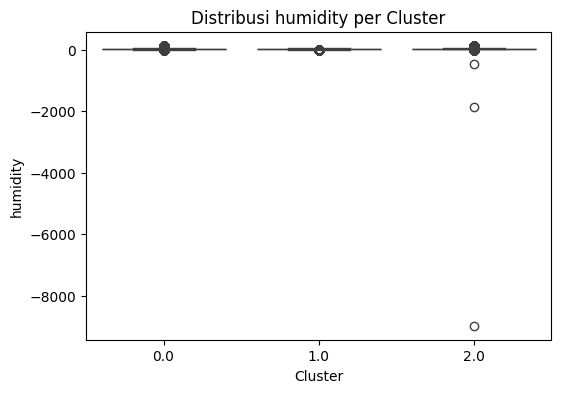

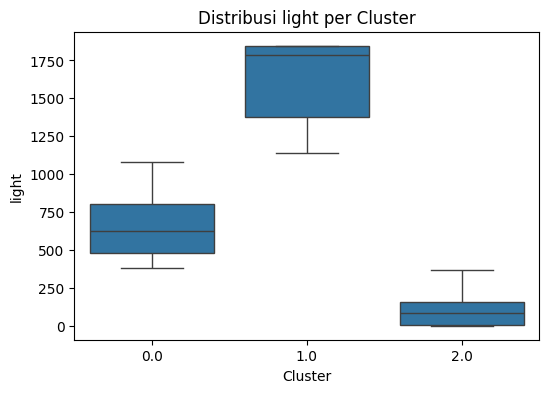

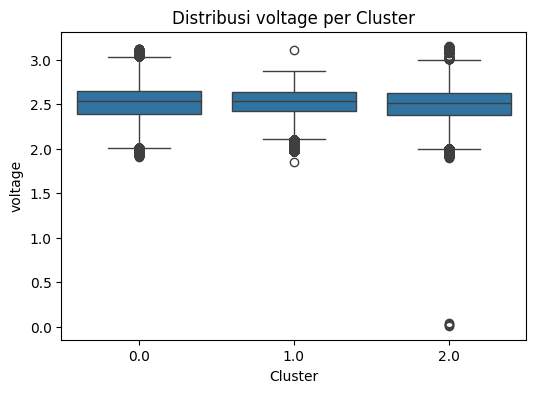

In [144]:
import seaborn as sns

# List of numerical columns to plot
numerical_columns_to_plot = ['temperature', 'humidity', 'light', 'voltage']

for col in numerical_columns_to_plot:
    # Check if the column and 'Cluster' exist in the DataFrame
    if col in data.columns and 'Cluster' in data.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Cluster', y=col, data=data)
        plt.title(f'Distribusi {col} per Cluster')
        plt.show()
    else:
        print(f"Required column '{col}' or 'Cluster' not found in the DataFrame.")

In [151]:
# Simpan data dengan cluster ke CSV di workspace Colab
output_path = 'hasil_clustering.csv'
data.to_csv(output_path, index=False)
print(f"File CSV berhasil disimpan sebagai {output_path}")

# Import library untuk download otomatis
from google.colab import files

# Download file langsung ke komputer pengguna
files.download(output_path)



File CSV berhasil disimpan sebagai hasil_clustering.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>